In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [6]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# Categorical Distribution Plots
We have two different kinds of categorical distribution plots, box plots and violin plots. These kinds of plots allow us to choose a numerical variable, like age, and plot the distribution of age for each category in a selected categorical variable.

Box Plots
Many of us have probably made quite a few box plots over the years. They are an easy and effective way to visualize groups of numerical data through their quartiles. Seaborn makes creating attractive box plots simple and allows us to easily compare an extra dimension with the hue argument that appears in many Seaborn functions.

# Basic Boxplot

Lets take a look at distribution of age by passenger class.

Text(0.5, 1.0, 'Age by Passenger Class, Titanic')

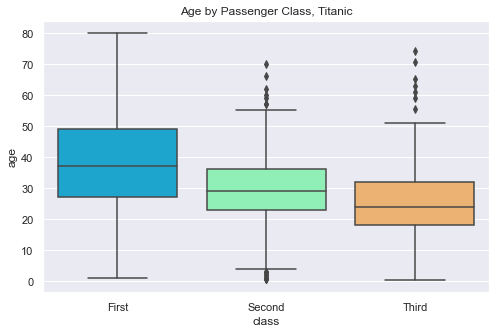

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class',y='age',data=titanic, palette='rainbow')
plt.title("Age by Passenger Class, Titanic")

We can see that age tends to decrease as you go down in passenger class. That makes sense, young people tend to travel on a budget. Notice how little code this required to create a pretty aesthetically pleasing plot? Seaborn’s basic plots are very polished.
Also pay attention to how we can wrap Matplotlib formatting syntax around our Seaborn plots. This only works when we are using Axis-level functions, which you can read about in another one of my posts about figure-level and axis-level functions in Seaborn.

# Adding Hue

Like many other plots available in Seaborn, box plots can take an added hue argument to add another variable for comparison.

Text(0.5, 1.0, 'Age by Passenger Class, Titanic')

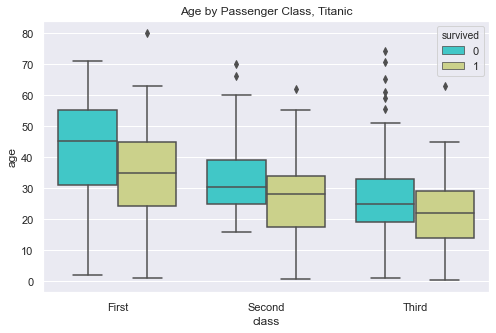

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class',y='age',data=titanic, palette='rainbow', hue = 'survived')
plt.title("Age by Passenger Class, Titanic")

Adding the hue shows us that regardless of class the age of passengers that survived was generally lower than those who passed away.
Having the hue for additional comparison allows this box plot to be quite information dense. The more complex the plot gets the longer it will take for viewers to comprehend it, but it is nice to have the option when interesting insights are more easily shown with an added dimension.

# Violin Plots

Violin plots are not very frequently used but I have found them to be useful on occasion, and they are an interesting change from more popular options. They plot a vertical kernel density plot for each category and a small box plot to summarize important statistics.

Text(0.5, 1.0, 'Violin Plot of Age by Class, Separated by Sex')

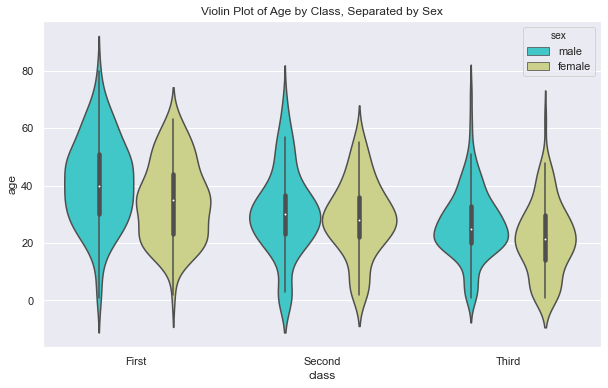

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class',y="age",data=titanic, hue='sex', palette='rainbow')
plt.title("Violin Plot of Age by Class, Separated by Sex")

While I like this plot, I think it is easier to compare the genders with slightly different formatting:

Text(0.5, 1.0, 'Violin Plot of Age by Class, Separated by Sex')

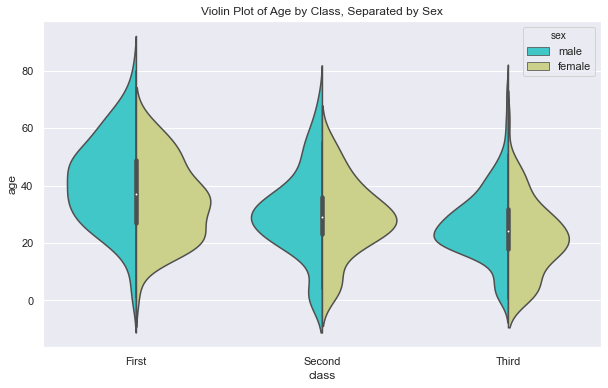

In [10]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class',y="age",data=titanic, hue='sex', split='True', palette='rainbow')
plt.title("Violin Plot of Age by Class, Separated by Sex")

When we split the violin on the hue it is a lot easier to see the differences in each KDE. However, the IQR stats aren’t split by the sex anymore; instead they apply to the entire class. So there are trade-offs to styling your plot in certain ways.

# Boxen Plot
The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000). It is similar to a traditional box plot, however it essentially just plots more quantiles. With more quantiles, we can see more info about the distribution shape beyond the central 50% of the data; this extra detail is especially present in the tails, where box plots tend to give limited information.

Text(0.5, 1.0, 'Distribution of Age by Passenger Class')

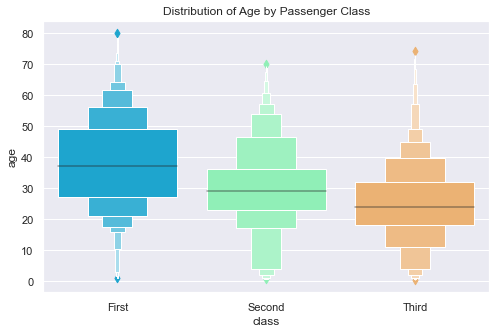

In [11]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='class', y='age', data=titanic, palette='rainbow')
plt.title("Distribution of Age by Passenger Class")

Just in case there still isn’t enough going on here for you, we can also add a hue to a boxen plot!

Text(0.5, 1.0, 'Distribution of Age by Passenger Class, Separated by Survival')

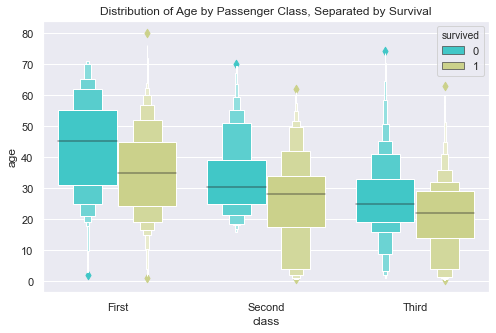

In [12]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='class', y='age', data=titanic, palette='rainbow', hue='survived')
plt.title("Distribution of Age by Passenger Class, Separated by Survival")

We can see that the boxen plot gives us much more information beyond the central 50% of the data. However, keep in mind that boxen plots are meant for larger data sets with entries between 10,000 and 100,000. This data set of under 1,000 entries is definitely not ideal. Here is a link to the paper where boxen plots were created that explains them very well.

# Categorical Estimate Plots

# Bar Plot
Bar plots are classic. You get an estimate of central tendency for a numerical variable for each class on the x axis. Say we were interested in knowing the average fare price of passengers that embarked from different towns:

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town')

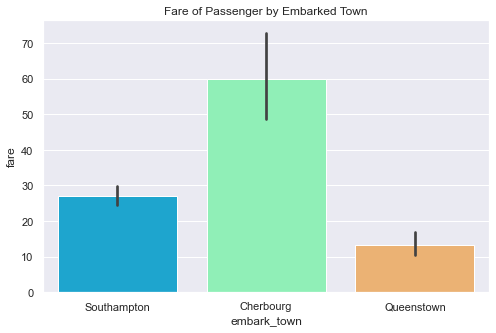

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='embark_town',y='fare',data=titanic, palette='rainbow')
plt.title("Fare of Passenger by Embarked Town")

Seaborn will take the mean as default, but you can use other measures of central tendency as well. There is a noticeable difference between Cherbourg and the other two, let’s separate the bars by class to see who was boarding in each town.

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town, Divided by Class')

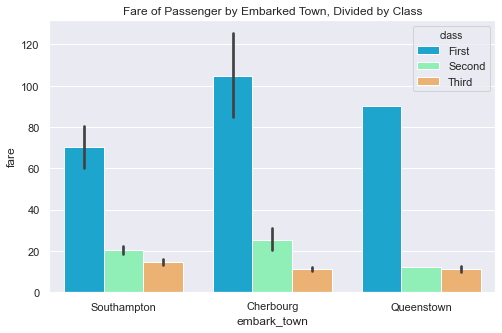

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='embark_town',y='fare',data=titanic, palette='rainbow', hue='class')
plt.title("Fare of Passenger by Embarked Town, Divided by Class")

Now we can see that the average fare price in Cherbourg was so high due to some very expensive first class tickets. The large error bar on the fare price in first class from Cherbourg is also interesting; that could mean there is a lot of separation between some very high price outlier tickets and the rest. We’ll explore this further in the combined plots section below!

# Point Plot
Point plots convey the same information as a bar plot with a different style. They can be good for overlaying with different plots since they have a smaller footprint in the space.

Text(0.5, 1.0, 'Average Fare Price by Embarked Town')

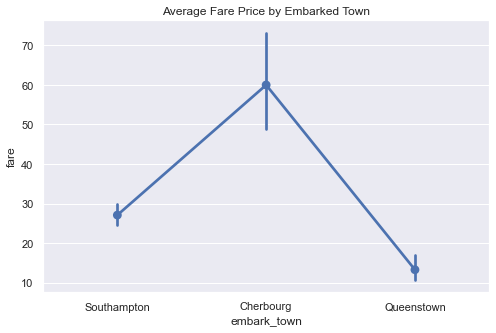

In [15]:
plt.figure(figsize=(8,5))
sns.pointplot(x='embark_town',y='fare',data=titanic)
plt.title("Average Fare Price by Embarked Town")

Text(0.5, 1.0, 'Average Fare Price by Embarked Town, Separated by Sex')

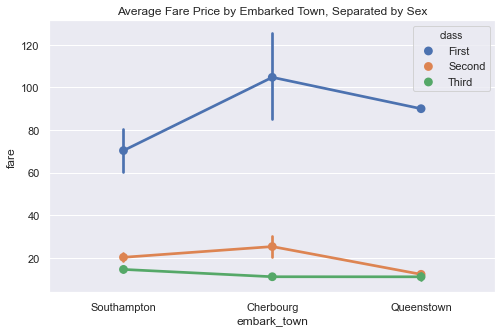

In [16]:
plt.figure(figsize=(8,5))
sns.pointplot(x='embark_town',y='fare',data=titanic, hue='class')
plt.title("Average Fare Price by Embarked Town, Separated by Sex")

# Count Plot
Count Plots are essentially histograms across a categorical variable. They take all the same arguments as bar plots in Seaborn, which helps keep things simple.

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

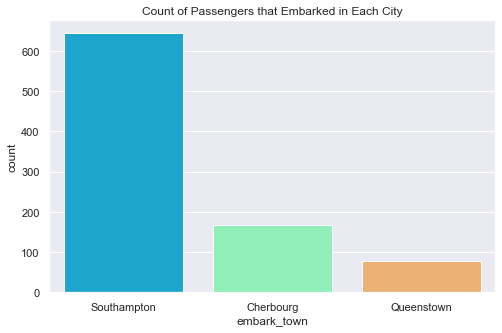

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='embark_town',data=titanic, palette='rainbow')
plt.title("Count of Passengers that Embarked in Each City")

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City, Separated by Sex')

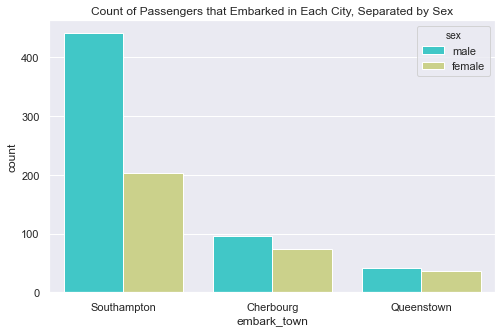

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='embark_town',data=titanic, palette='rainbow',hue='sex')
plt.title("Count of Passengers that Embarked in Each City, Separated by Sex")

# Categorical Scatter Plots
Both strip plots and swarm plots are essentially scatter plots where one variable is categorical. I like to use them as additions to other kinds of plots, which we’ll discuss below as they are useful for quickly visualizing the number of data points in a group.

# Strip Plot

<AxesSubplot:xlabel='class', ylabel='age'>

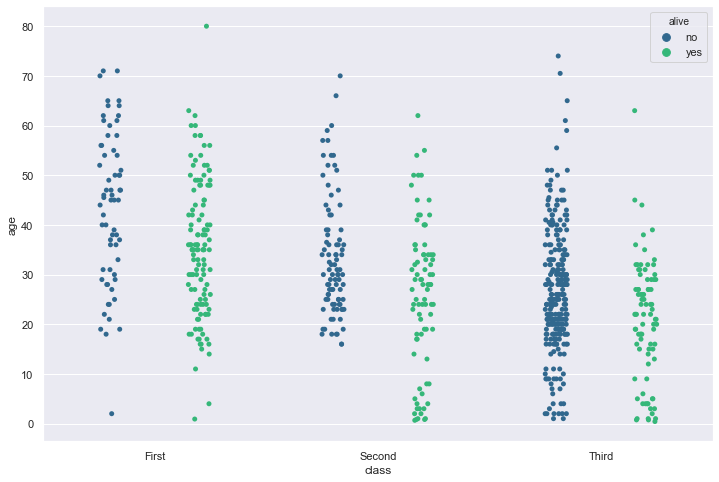

In [19]:
plt.figure(figsize=(12,8))
sns.stripplot(x='class', y='age', data=titanic, jitter=True, hue='alive', dodge=True, palette='viridis')

I don’t love the way strip plots look when you have a lot of data points. But swarm plots might make this a little more useful. Strip plots can look great with less data points and they can convey really interesting attributes of your data since they don’t hide details behind aggregation.

# Swarm Plot
Swarm plots are fantastic because they offer an easy way to show the individual data points in a distribution. Instead of a big blob like the strip plot, the swarm plot simply adjusts the points along the x-axis. Although they also don’t scale well with tons of values, they offer more organized insight.

C:\Users\Vignesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Vignesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0.5, 1.0, 'Age by Passenger Class, Separated by Survival')

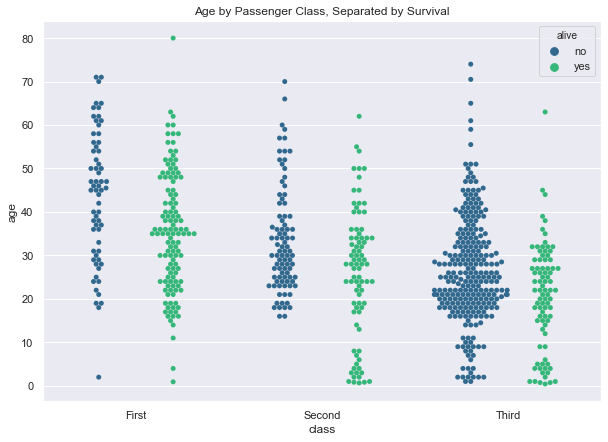

In [20]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='class', y='age', data=titanic, hue='alive', dodge=True, palette='viridis')
plt.title("Age by Passenger Class, Separated by Survival")

Here we can more easily see where the dense age groups are rather than the difficult to interpret strip plot above.

# Combining Plots
One of my favorite uses for a swarm plot is to enhance another kind of plot since they convey relative volume very well. As we will see in the violin plot below even though at one point the KDE values may look similarly “large”, the volume of data points in each of the classes may be quite different. We can add a swarm plot on top of our violin plot to show the individual data points that help to give us a more complete picture.

Text(0.5, 1.0, 'Age by Passenger Class, Separated by Survival')

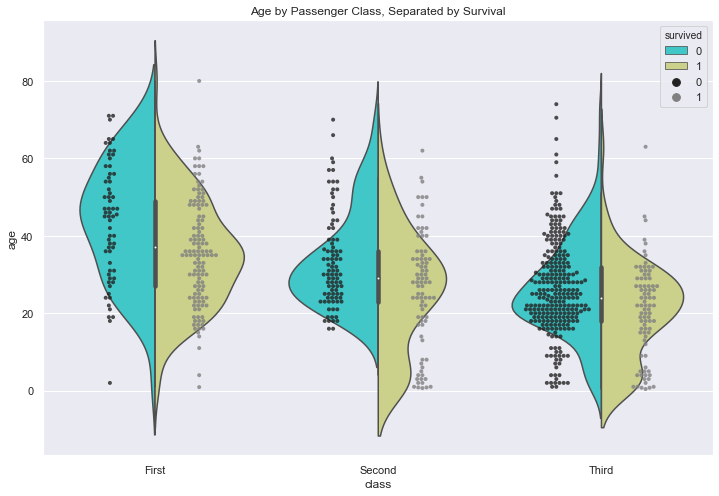

In [25]:
plt.figure(figsize=(12,8))
sns.violinplot(x='class',y="age", data=titanic, hue='survived', split='True', palette='rainbow')
sns.swarmplot(x='class',y="age", data=titanic, hue='survived', dodge='True', color='grey', alpha=.8, s=4)
plt.title("Age by Passenger Class, Separated by Survival")

By adding the swarm plot we can see where the actual majority of data points are contained. I have seen Violin plots misinterpreted many times where a viewer may assume a relatively similar number of ~25 year old third class passengers lived and survived in third class, and the swarm plot does a great job clearing that up.

C:\Users\Vignesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Vignesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0.5, 1.0, 'Age by Passenger Class, Separated by Survival')

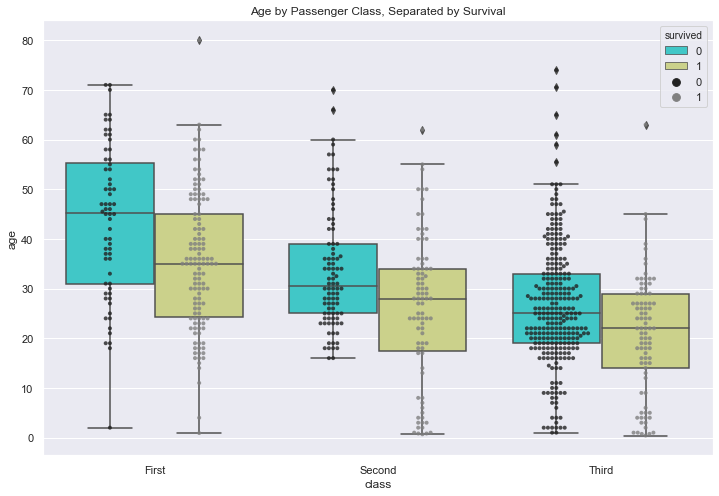

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class',y='age',hue='survived',data=titanic, palette='rainbow')
sns.swarmplot(x='class',y='age',hue='survived', dodge=True,data=titanic, alpha=.8,color='grey',s=4)
plt.title("Age by Passenger Class, Separated by Survival")

The story is very similar with box plots as with violin plots. Summary statistics of each group are very useful, however adding the swarm plot helps to show a more complete story.
Remember when were looking at the average ticket prices by the town embarked from and separated by passenger class earlier?


We saw that the price of Cherbourg tickets was high, which turned out was due to the mean price of first class tickets being so high in Cherbourg. We also had this large error bar on the mean price of first class tickets in Cherbourg. Using a strip plot, we can try to get a better understanding of what’s happening there.

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town, Divided by Class')

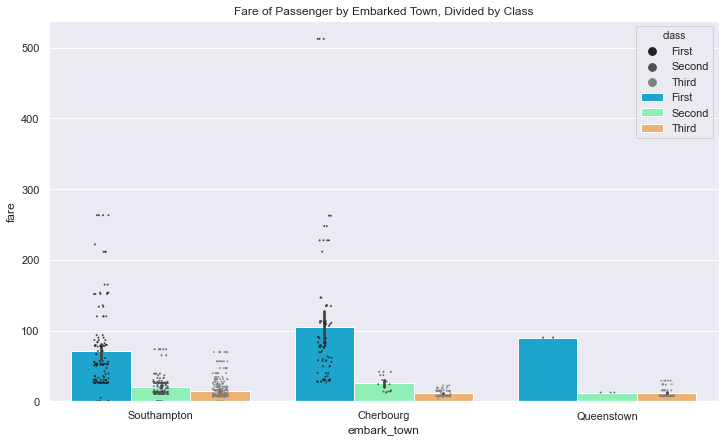

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x='embark_town',y='fare',data=titanic, palette='rainbow', hue='class')
sns.stripplot(x='embark_town',y="fare",data=titanic, hue='class', dodge='True', color='grey', alpha=.8, s=2)
plt.title("Fare of Passenger by Embarked Town, Divided by Class")

# Faceting Data with Catplot
Catplot() is the figure-level function that can create all of the above plots we have discussed. Figure-level functions plot a Seaborn object and interface with the Matplotlib API instead of creating a Matplotlib object like Seaborn’s axis-level functions.
While working with figure-level functions is generally more complex and has less clear documentation, there are some strengths that make them worth using in certain cases. They are particularly good at faceting data into subplots as we can see below.

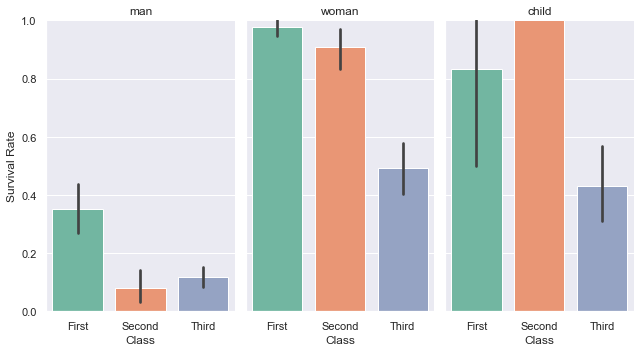

In [28]:
g = sns.catplot(x='class',y='survived', col = 'who', data=titanic,
                kind='bar', aspect=.6, palette='Set2')
(g.set_axis_labels("Class", "Survival Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))
plt.tight_layout()
plt.savefig('seaborn_catplot.png', dpi=1000)

In [31]:
titanic['who'].head(20)

0       man
1     woman
2     woman
3     woman
4       man
5       man
6       man
7     child
8     woman
9     child
10    child
11    woman
12      man
13      man
14    child
15    woman
16    child
17      man
18    woman
19    woman
Name: who, dtype: object

Faceting data allows us to see data at different granularities. Faceting is really a fancy word for separating data into classes along a specific dimension(s). So here we are separating the data along the “who” variable, which allows us to plot each type of person separately.

Being able to say col='<column_name>' to automatically facet is a powerful option that most figure-level functions have access to. Accomplishing the same thing in Matplotlib requires significantly more time subsetting data and creating multiple subplots manually. I discuss the power of figure-level plotting more in this article.

Don’t forget that we could still add a hue argument to add even more information to this plot! Faceting data with Seaborn’s figure-level functionality can be an excellent way to make more complex plots.

You will notice that Seaborn figures require different functions for formatting, however saving the plot can still be done via plt.savefig() since the final Seaborn figure interfaces with the Matplotlib API. I won’t get into detail on figure-level plotting since there is a lot to discuss, but do read my other article about the topic if you are curious.

https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec